In [25]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [26]:
def read_field_from_file(filename, num_halo=None):
    (rank, nbits, num_halo, nx, ny, nz) = np.fromfile(filename, dtype=np.int32, count=6)
    offset=(3 + rank) * 32 // nbits
    data = np.fromfile(filename, dtype=np.float32 if nbits == 32 else np.float64, \
                       count=nz * ny * nx + offset)
    if rank == 3:
        return np.reshape(data[offset:], (nz, ny, nx))
    else:
        return np.reshape(data[offset:], (ny, nx))



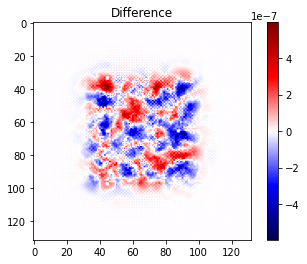

In [33]:
#define difference field
mpifield, mpiompfield = read_field_from_file('out_field_mpi.dat'),read_field_from_file('out_field_mpiomp.dat')
difffield=mpifield-mpiompfield

#plot
fig, axs = plt.subplots()
im = axs.imshow(difffield[difffield.shape[0] // 2, :, :],cmap='seismic');
fig.colorbar(im, ax=axs);
axs.set_title('Difference');
plt.show()